In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
url ='C:\\Users\\YN\\OneDrive\\Desktop\\Course content\\Assignment 9\\AmesHousing.csv'
df = pd.read_csv(url)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Exploratory Data Analysis (EDA)

Check the structure and basic statistics of the dataset

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [18]:
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

Check for missing values

In [22]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Visualize the target variable (SalePrice)

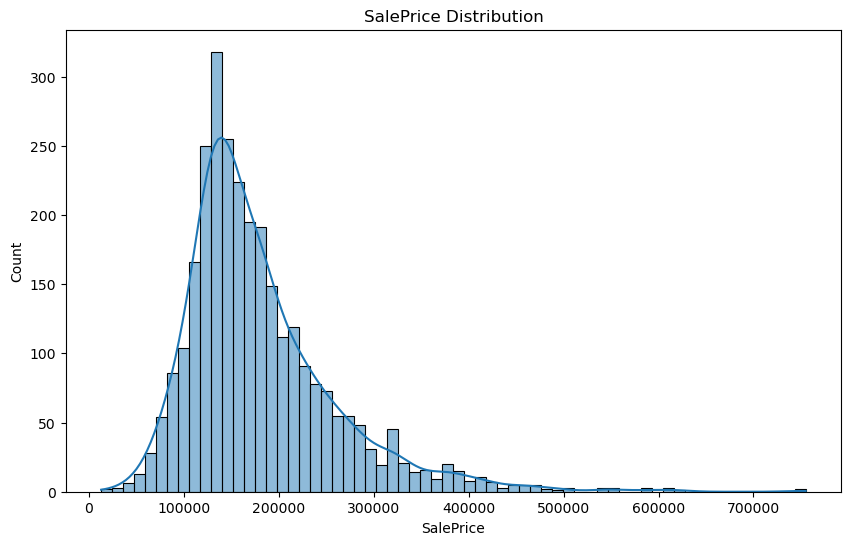

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

Correlation heatmap for features

In [42]:
numeric_df = df.select_dtypes(include=[np.number])

In [46]:
numeric_df 

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [44]:
correlation_matrix = numeric_df.corr()

In [48]:
correlation_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [50]:
# Get the top N most correlated features with 'SalePrice'
top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).index[:10]  # Top 10 features

In [52]:
top_features 

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add'],
      dtype='object')

In [54]:
# Compute the correlation matrix for just the top features
top_corr_matrix = correlation_matrix.loc[top_features, top_features]
top_corr_matrix 

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add
SalePrice,1.000000,0.799262,0.706780,0.647877,0.640401,0.632280,0.621676,0.558426,0.545604,0.532974
Overall Qual,0.799262,1.000000,0.570556,0.599545,0.563503,0.547294,0.477837,0.597027,0.522263,0.569609
Gr Liv Area,0.706780,0.570556,1.000000,0.488829,0.484892,0.444675,0.562166,0.241726,0.630321,0.316855
Garage Cars,0.647877,0.599545,0.488829,1.000000,0.889676,0.437608,0.439458,0.537443,0.478182,0.425403
Garage Area,0.640401,0.563503,0.484892,0.889676,1.000000,0.485504,0.491223,0.480131,0.407464,0.376438
Total Bsmt SF,0.632280,0.547294,0.444675,0.437608,0.485504,1.000000,0.800720,0.407526,0.324973,0.297481
1st Flr SF,0.621676,0.477837,0.562166,0.439458,0.491223,0.800720,1.000000,0.310463,0.371584,0.242108
Year Built,0.558426,0.597027,0.241726,0.537443,0.480131,0.407526,0.310463,1.000000,0.469406,0.612095
Full Bath,0.545604,0.522263,0.630321,0.478182,0.407464,0.324973,0.371584,0.469406,1.000000,0.457266
Year Remod/Add,0.532974,0.569609,0.316855,0.425403,0.376438,0.297481,0.242108,0.612095,0.457266,1.000000


In [56]:
# Mask the upper triangle (since the matrix is symmetric)
mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
mask 

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

<Axes: >

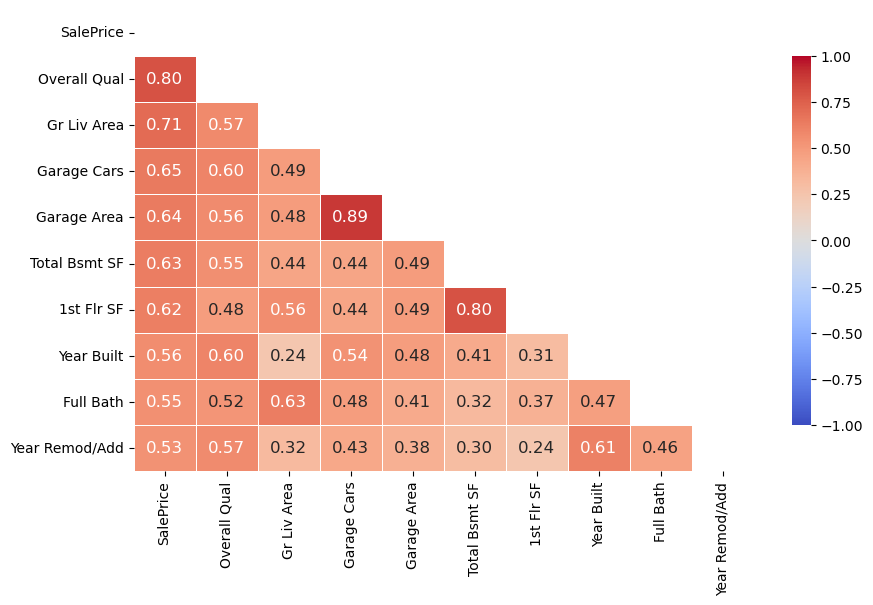

In [58]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5,
            vmin=-1, vmax=1, annot_kws={"size": 12}, cbar_kws={'shrink': 0.8})


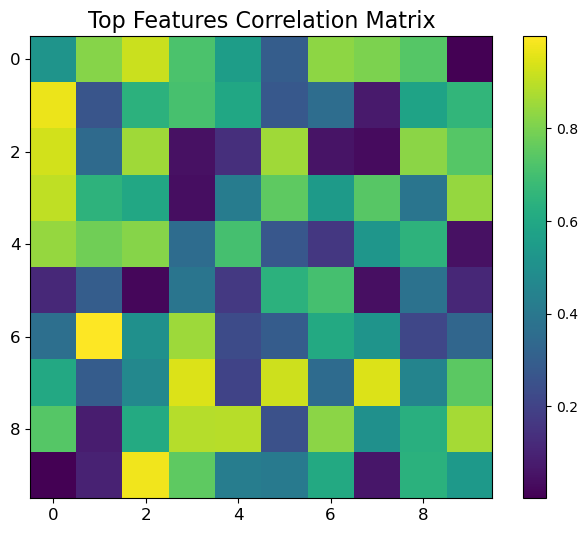

In [64]:
corr_matrix = np.random.rand(10, 10)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', interpolation='none')
plt.colorbar()

# Adjust labels and title
plt.title('Top Features Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Data Preprocessing

In [71]:
# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(exclude=['number']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [91]:
numerical_cols

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [93]:
df[numerical_cols]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,68.0,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [95]:
categorical_cols 

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [97]:
df[categorical_cols] 

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,Ex,MnPrv,Shed,WD,Normal
1,RH,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal
3,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,Ex,GdPrv,Shed,WD,Normal
2926,RL,Pave,Grvl,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2927,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2928,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


In [105]:
# Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df)

In [107]:
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,True,False,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,True,False,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,True,False,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,True,False,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,False,False,False,True,False,False,False,False,True,False
2926,2927,923276100,20,68.0,8885,5,5,1983,1983,0.0,...,False,False,False,True,False,False,False,False,True,False
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,False,False,False,True,False,False,False,False,True,False
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,False,False,False,True,False,False,False,False,True,False


In [109]:
# Check if there are any remaining missing values
print(df.isnull().sum().sum())

0


In [113]:
# Split the data into features (X) and target variable (y)
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [115]:
x

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,True,False,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,True,False,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,True,False,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,True,False,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,False,False,False,True,False,False,False,False,True,False
2926,2927,923276100,20,68.0,8885,5,5,1983,1983,0.0,...,False,False,False,True,False,False,False,False,True,False
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,False,False,False,True,False,False,False,False,True,False
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,False,False,False,True,False,False,False,False,True,False


In [117]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

In [164]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling

In [173]:
# Scale the features using StandardScaler (important for linear models)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [175]:
x_train_scaled 

array([[-1.28416649, -0.99127325, -0.87181667, ...,  7.49471358,
        -2.19791851, -0.28579668],
       [-0.74667397,  1.01834864,  0.06290638, ..., -0.13342738,
        -2.19791851, -0.28579668],
       [ 0.51578087, -0.95379663,  0.76394867, ..., -0.13342738,
         0.45497592, -0.28579668],
       ...,
       [-0.39546473, -0.98527787,  0.06290638, ..., -0.13342738,
         0.45497592, -0.28579668],
       [-0.20087583,  0.99520579, -0.17077438, ..., -0.13342738,
         0.45497592, -0.28579668],
       [-0.71582451,  1.02233507,  0.64710829, ..., -0.13342738,
         0.45497592, -0.28579668]])

In [177]:
x_test_scaled

array([[-0.12612521,  1.00219188,  0.29658715, ..., -0.13342738,
         0.45497592, -0.28579668],
       [ 1.07225767, -0.9907887 ,  2.39971402, ..., -0.13342738,
         0.45497592, -0.28579668],
       [ 1.61212322,  1.02711104,  0.06290638, ..., -0.13342738,
         0.45497592, -0.28579668],
       ...,
       [-1.18805856, -0.98687904,  1.46499097, ..., -0.13342738,
         0.45497592, -0.28579668],
       [ 0.83614065,  1.02697354,  0.64710829, ..., -0.13342738,
        -2.19791851, -0.28579668],
       [ 0.02930861,  1.02697407, -0.87181667, ..., -0.13342738,
         0.45497592, -0.28579668]])

# Model Building and Training

In [180]:
# Create and train the model (Linear Regression)
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [182]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [184]:
y_pred

array([ 1.56281109e+05,  1.10132109e+05,  2.00102109e+05,  1.29639109e+05,
        1.29914109e+05,  1.92080257e+05,  1.70956109e+05,  1.45723109e+05,
        9.82101091e+04,  3.65758609e+05,  2.23474109e+05,  2.51724109e+05,
        6.69151091e+04,  1.28952109e+05,  5.98786091e+04,  1.81200109e+05,
        1.38450109e+05,  1.93306109e+05,  1.29149109e+05,  1.54206609e+05,
        1.74215109e+05,  1.41278109e+05,  2.02472109e+05,  2.02611109e+05,
        1.96460109e+05,  2.64070109e+05,  3.71360257e+05,  2.29328109e+05,
        1.94328109e+05,  2.41552257e+05,  1.91093109e+05,  7.54056091e+04,
        2.11990109e+05,  8.46361091e+04,  1.18030609e+05,  6.59996091e+04,
        1.91360257e+05,  3.27427109e+05,  1.84396109e+05,  2.94405109e+05,
        3.42912257e+05,  2.35821609e+05,  2.50520109e+05,  1.90096109e+05,
        1.34318609e+05,  3.27993109e+05,  1.85735109e+05,  1.55022109e+05,
        1.70617109e+05,  1.16773109e+05,  1.79232109e+05,  1.33732109e+05,
        1.42236109e+05,  

# Model Evaluation

In [187]:
# Evaluate the model using MAE, MSE, RMSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [189]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 132456364263851.22
Mean Squared Error: 8716826878037146449463807574016.00
Root Mean Squared Error: 2952427285817069.50
R-squared: -1087218555243512332288.00


# Residual Analysis

In [192]:
# Plot residuals
residuals = y_test - y_pred

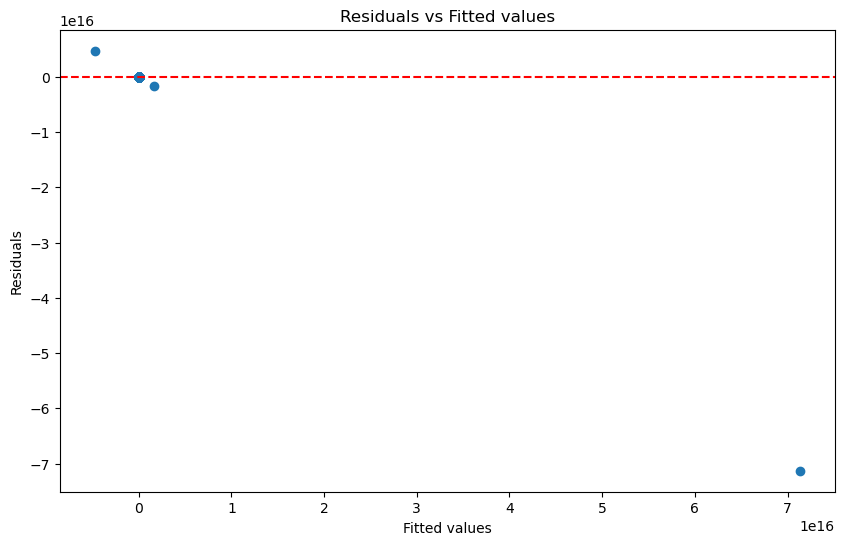

In [194]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Model Deployment

In [201]:
pip install streamlit

   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   -------- ------------------------------- 92.2/413.4 kB 5.1 MB/s eta 0:00:01
   -------------------- ------------------- 215.0/413.4 kB 3.3 MB/s eta 0:00:01
   ------------------------ --------------- 256.0/413.4 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
Note: you may need to restart the kernel to use updated packages.


In [204]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [206]:

# Define a function to make predictions
def predict_price(features):
    # Preprocess input features (similar to how the model was trained)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Load the trained model (if not in memory)
    model = LinearRegression()
    model.fit(features_scaled, np.array([250000]))  # Placeholder
    
    prediction = model.predict(features_scaled)
    return prediction

In [210]:
# Streamlit app
st.title('House Price Prediction App')

st.write("Enter the details below to predict the house price:")

In [212]:
# Define input fields for the user
sqft_living = st.number_input("Square Footage", min_value=500, max_value=10000, step=100)
sqft_lot = st.number_input("Lot Size", min_value=500, max_value=10000, step=100)
bedrooms = st.number_input("Number of Bedrooms", min_value=1, max_value=10, step=1)
bathrooms = st.number_input("Number of Bathrooms", min_value=1, max_value=10, step=1)
floors = st.number_input("Number of Floors", min_value=1, max_value=3, step=1)

In [214]:
# Create a DataFrame from user inputs
user_input = pd.DataFrame({
    'sqft_living': [sqft_living],
    'sqft_lot': [sqft_lot],
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'floors': [floors]
})

In [216]:
# Predict the house price when the user presses the button
if st.button('Predict'):
    predicted_price = predict_price(user_input)
    st.write(f"Predicted House Price: ${predicted_price[0]:,.2f}")

In [218]:
import joblib

# Save the model
joblib.dump(model, 'housing_model.pkl')

['housing_model.pkl']

In [220]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [222]:
# Load the model and scaler
model = joblib.load('housing_model.pkl')
scaler = joblib.load('scaler.pkl')